In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## datasets

In [19]:
df = pd.read_csv('../datasets/automobile.csv')

In [20]:
df.head()

,Normalized-losses,Make,Fuel-type,Aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,Length,...,Fuel-system,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price,Symboling
0,168,toyota,gas,std,two,sedan,rwd,front,94.5,168.7,...,2bbl,3.19,3.03,9.0,70,4800,29,34,8058,1
1,113,mazda,gas,std,four,sedan,fwd,front,93.1,166.8,...,2bbl,3.08,3.15,9.0,68,5000,31,38,7395,1
2,87,toyota,gas,std,two,hatchback,fwd,front,95.7,158.7,...,2bbl,3.05,3.03,9.0,62,4800,35,39,5348,1
3,125,mitsubishi,gas,std,four,sedan,fwd,front,96.3,172.4,...,2bbl,3.35,3.46,8.5,88,5000,25,32,6989,1
4,148,dodge,gas,turbo,?,sedan,fwd,front,93.7,157.3,...,mpfi,3.03,3.39,7.6,102,5500,24,30,8558,1


In [21]:
df.shape

(205, 26)

In [22]:
df.dtypes

Normalized-losses     object
Make                  object
Fuel-type             object
Aspiration            object
Num-of-doors          object
Body-style            object
Drive-wheels          object
Engine-location       object
Wheel-base           float64
Length               float64
Width                float64
Height               float64
Curb-weight            int64
Engine-type           object
Num-of-cylinders      object
Engine-size            int64
Fuel-system           object
Bore                  object
Stroke                object
Compression-ratio    float64
Horsepower            object
Peak-rpm              object
City-mpg               int64
Highway-mpg            int64
Price                 object
Symboling              int64
dtype: object

## Preprocessing

In [23]:
from collections import Counter

In [24]:
print(Counter(df['Symboling']))

Counter({0: 67, 1: 54, 2: 32, 3: 27, -1: 22, -2: 3})


In [25]:
print(Counter(df['Make']))

Counter({'toyota': 32, 'nissan': 18, 'mazda': 17, 'mitsubishi': 13, 'honda': 13, 'volkswagen': 12, 'subaru': 12, 'peugot': 11, 'volvo': 11, 'dodge': 9, 'bmw': 8, 'mercedes-benz': 8, 'plymouth': 7, 'audi': 7, 'saab': 6, 'porsche': 5, 'isuzu': 4, 'jaguar': 3, 'chevrolet': 3, 'alfa-romero': 3, 'renault': 2, 'mercury': 1})


In [26]:
size_mapping = {'toyota': 1, 'nissan': 2, 'mazda': 3, 'mitsubishi': 4,
                'honda': 5, 'volkswagen': 6, 'subaru': 7, 'peugot': 8,
                'volvo': 9, 'dodge': 10, 'bmw': 11, 'mercedes-benz': 12,
                'plymouth': 13, 'audi': 14, 'saab': 15, 'porsche': 16, 
                'isuzu': 17, 'jaguar': 18, 'chevrolet': 19, 'alfa-romero': 20,
                'renault': 21, 'mercury': 22}
df['Make'] = df['Make'].map(size_mapping)

In [27]:
print(Counter(df['Fuel-type']))

Counter({'gas': 185, 'diesel': 20})


In [28]:
size_mapping = {'gas': 1, 'diesel': 2}
df['Fuel-type'] = df['Fuel-type'].map(size_mapping)

In [29]:
print(Counter(df['Aspiration']))

Counter({'std': 168, 'turbo': 37})


In [30]:
size_mapping = {'std': 1, 'turbo': 2}
df['Aspiration'] = df['Aspiration'].map(size_mapping)

In [31]:
print(Counter(df['Num-of-doors']))

Counter({'four': 114, 'two': 89, '?': 2})


In [32]:
size_mapping = {'four': 4, 'two': 2}
df['Num-of-doors'] = df['Num-of-doors'].map(size_mapping)

In [33]:
print(Counter(df['Body-style']))

Counter({'sedan': 96, 'hatchback': 70, 'wagon': 25, 'hardtop': 8, 'convertible': 6})


In [34]:
size_mapping = {'sedan': 1, 'hatchback': 2, 'wagon': 3, 'hardtop': 4,
                'convertible': 5}
df['Body-style'] = df['Body-style'].map(size_mapping)

In [35]:
print(Counter(df['Drive-wheels']))

Counter({'fwd': 120, 'rwd': 76, '4wd': 9})


In [36]:
size_mapping = {'fwd': 1, 'rwd': 2, '4wd': 3}
df['Drive-wheels'] = df['Drive-wheels'].map(size_mapping)

In [37]:
print(Counter(df['Engine-location']))

Counter({'front': 202, 'rear': 3})


In [38]:
size_mapping = {'front': 1, 'rear': 2}
df['Engine-location'] = df['Engine-location'].map(size_mapping)

In [39]:
print(Counter(df['Engine-type']))

Counter({'ohc': 148, 'ohcf': 15, 'ohcv': 13, 'l': 12, 'dohc': 12, 'rotor': 4, 'dohcv': 1})


In [40]:
size_mapping = {'ohc': 1, 'ohcf': 2, 'ohcv': 3, 'l': 4,
                'dohc': 5, 'rotor': 6, 'dohcv': 7}
df['Engine-type'] = df['Engine-type'].map(size_mapping)

In [41]:
print(Counter(df['Num-of-cylinders']))

Counter({'four': 159, 'six': 24, 'five': 11, 'eight': 5, 'two': 4, 'twelve': 1, 'three': 1})


In [42]:
size_mapping = {'four': 4, 'six': 6, 'five': 5, 'eight': 8, 'two': 2,
                'twelve': 12, 'three': 3}
df['Num-of-cylinders'] = df['Num-of-cylinders'].map(size_mapping)

In [43]:
print(Counter(df['Fuel-system']))

Counter({'mpfi': 94, '2bbl': 66, 'idi': 20, '1bbl': 11, 'spdi': 9, '4bbl': 3, 'spfi': 1, 'mfi': 1})


In [44]:
size_mapping = {'mpfi': 1, '2bbl': 2, 'idi': 3, '1bbl': 4,
                'spdi': 5, '4bbl': 6, 'spfi': 7, 'mfi': 8}
df['Fuel-system'] = df['Fuel-system'].map(size_mapping)

In [45]:
df.head()

,Normalized-losses,Make,Fuel-type,Aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,Length,...,Fuel-system,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price,Symboling
0,168,1,1,1,2.0,1,2,1,94.5,168.7,...,2,3.19,3.03,9.0,70,4800,29,34,8058,1
1,113,3,1,1,4.0,1,1,1,93.1,166.8,...,2,3.08,3.15,9.0,68,5000,31,38,7395,1
2,87,1,1,1,2.0,2,1,1,95.7,158.7,...,2,3.05,3.03,9.0,62,4800,35,39,5348,1
3,125,4,1,1,4.0,1,1,1,96.3,172.4,...,2,3.35,3.46,8.5,88,5000,25,32,6989,1
4,148,10,1,2,NaN,1,1,1,93.7,157.3,...,1,3.03,3.39,7.6,102,5500,24,30,8558,1


In [47]:
# replace ? to NaN
df = df.replace('?',np.nan)

# change dtypes: object to float
dic = {}
for i in df.columns[:-1]:
    dic[i] = float

df = df.astype(dic)

In [48]:
df.isnull().sum()

Normalized-losses    41
Make                  0
Fuel-type             0
Aspiration            0
Num-of-doors          2
Body-style            0
Drive-wheels          0
Engine-location       0
Wheel-base            0
Length                0
Width                 0
Height                0
Curb-weight           0
Engine-type           0
Num-of-cylinders      0
Engine-size           0
Fuel-system           0
Bore                  4
Stroke                4
Compression-ratio     0
Horsepower            2
Peak-rpm              2
City-mpg              0
Highway-mpg           0
Price                 4
Symboling             0
dtype: int64

In [49]:
df.dtypes

Normalized-losses    float64
Make                 float64
Fuel-type            float64
Aspiration           float64
Num-of-doors         float64
Body-style           float64
Drive-wheels         float64
Engine-location      float64
Wheel-base           float64
Length               float64
Width                float64
Height               float64
Curb-weight          float64
Engine-type          float64
Num-of-cylinders     float64
Engine-size          float64
Fuel-system          float64
Bore                 float64
Stroke               float64
Compression-ratio    float64
Horsepower           float64
Peak-rpm             float64
City-mpg             float64
Highway-mpg          float64
Price                float64
Symboling              int64
dtype: object

In [50]:
print('Number of missing value data:', df[df.isnull().any(axis=1)].shape[0])
print('Missing value ratio:', (df[df.isnull().any(axis=1)].shape[0] / df.shape[0]) *100)

Number of missing value data: 46
Missing value ratio: 22.439024390243905


In [79]:
df_del.dtypes

Normalized-losses    float64
Make                 float64
Fuel-type            float64
Aspiration           float64
Num-of-doors         float64
Body-style           float64
Drive-wheels         float64
Engine-location      float64
Wheel-base           float64
Length               float64
Width                float64
Height               float64
Curb-weight          float64
Engine-type          float64
Num-of-cylinders     float64
Engine-size          float64
Fuel-system          float64
Bore                 float64
Stroke               float64
Compression-ratio    float64
Horsepower           float64
Peak-rpm             float64
City-mpg             float64
Highway-mpg          float64
Price                float64
Symboling              int64
dtype: object

## Missing data visualization

In [51]:
import missingno as msno

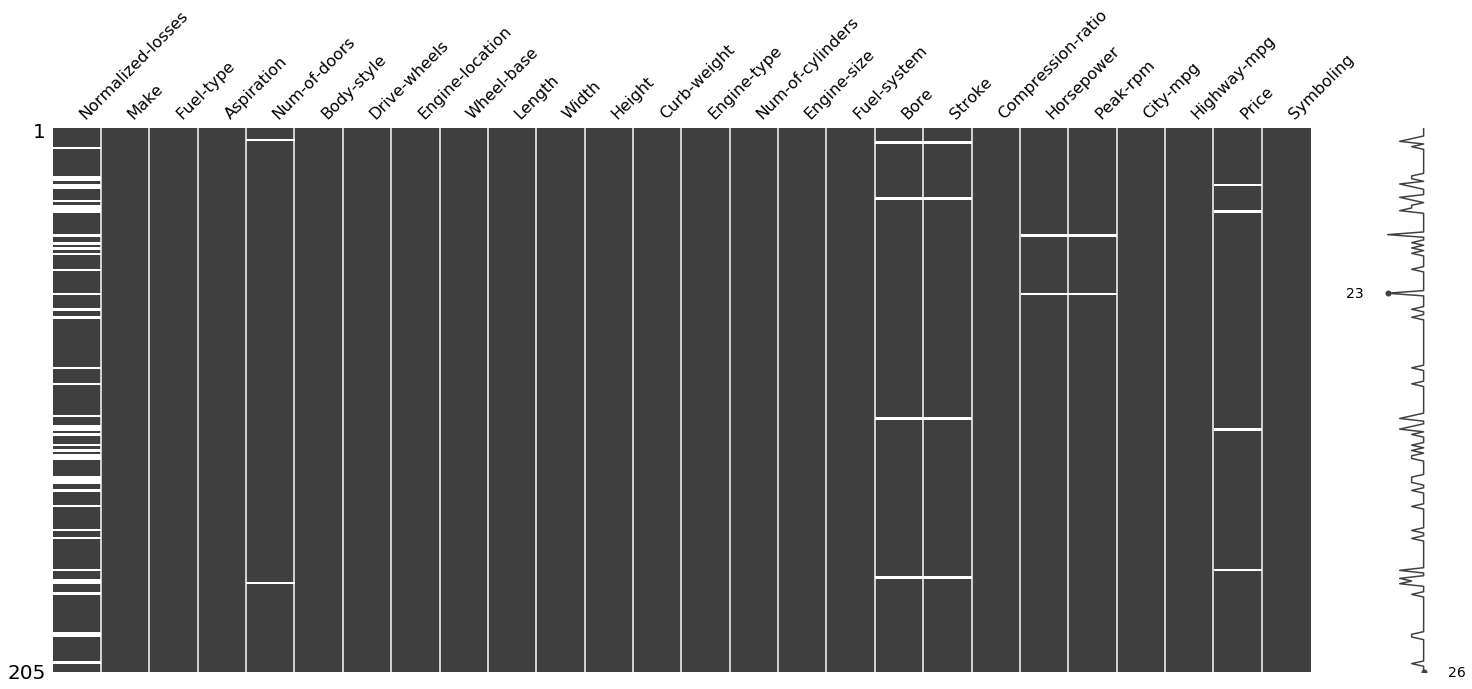

In [52]:
msno.matrix(df)

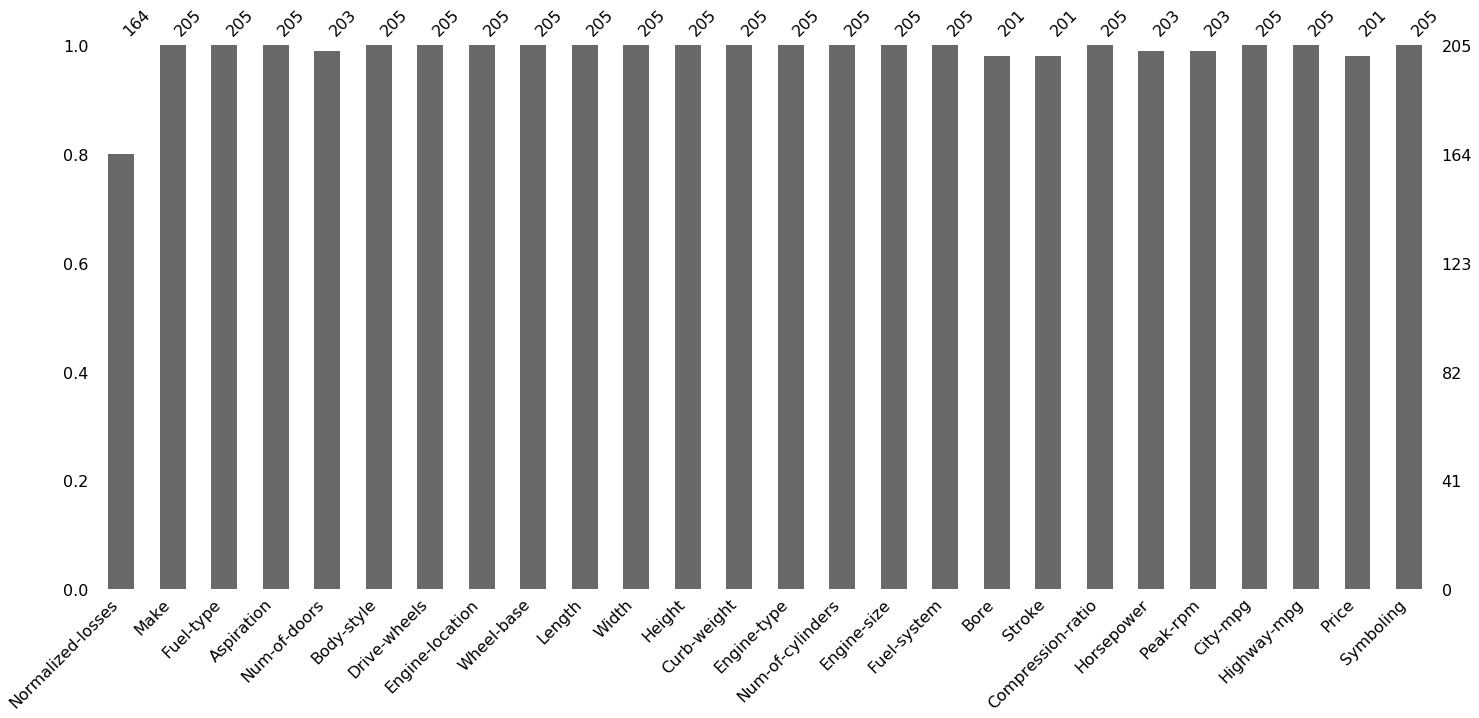

In [53]:
msno.bar(df)

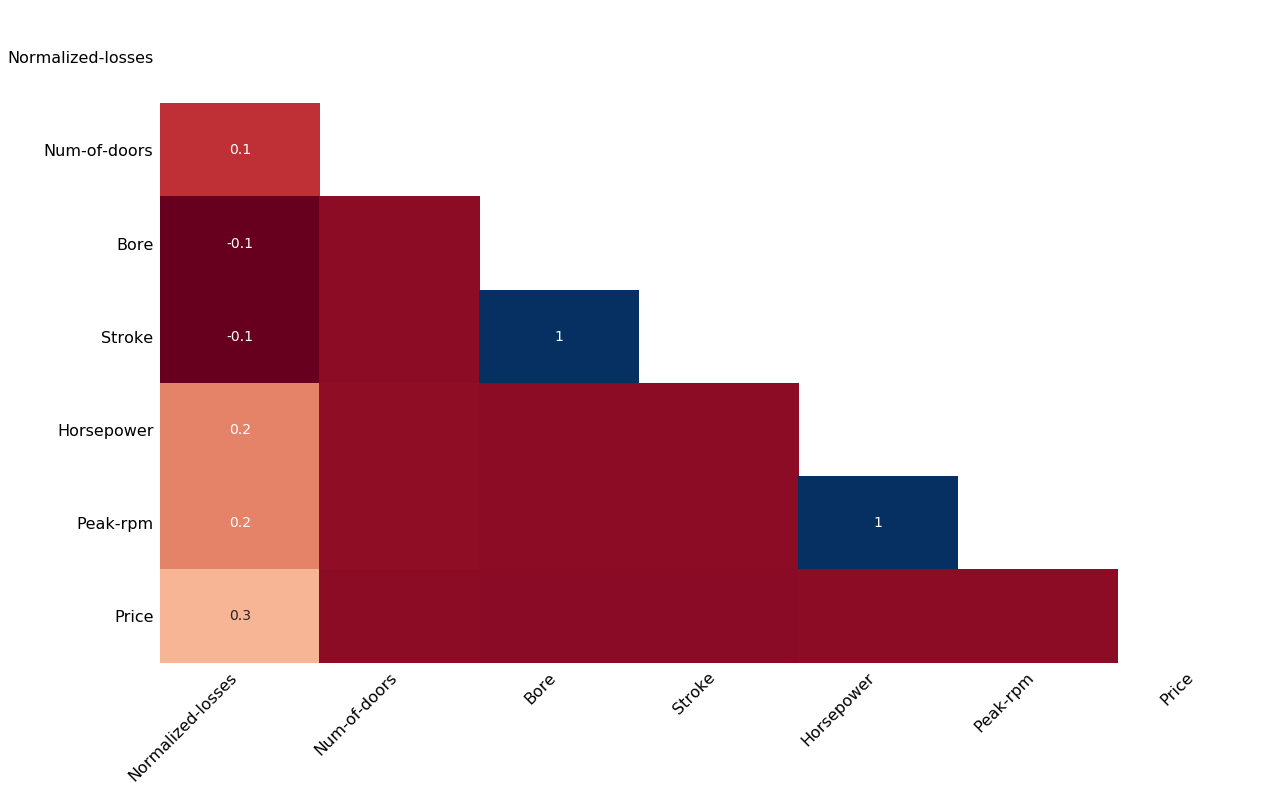

In [54]:
# Nullity correlation
msno.heatmap(df)

## Delete missing data

In [55]:
# delete NaN
df_del = df.dropna()

print('Original:', df.shape)
print('Delete:', df_del.shape)

Original: (205, 26)
Delete: (159, 26)


## Impute missing data

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

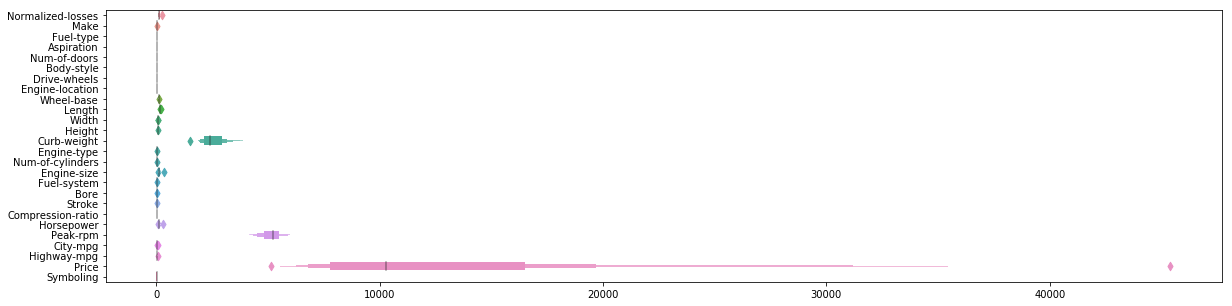

In [56]:
plt.figure(figsize=(20, 5))
sns.boxenplot(data=df, orient="h")

/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


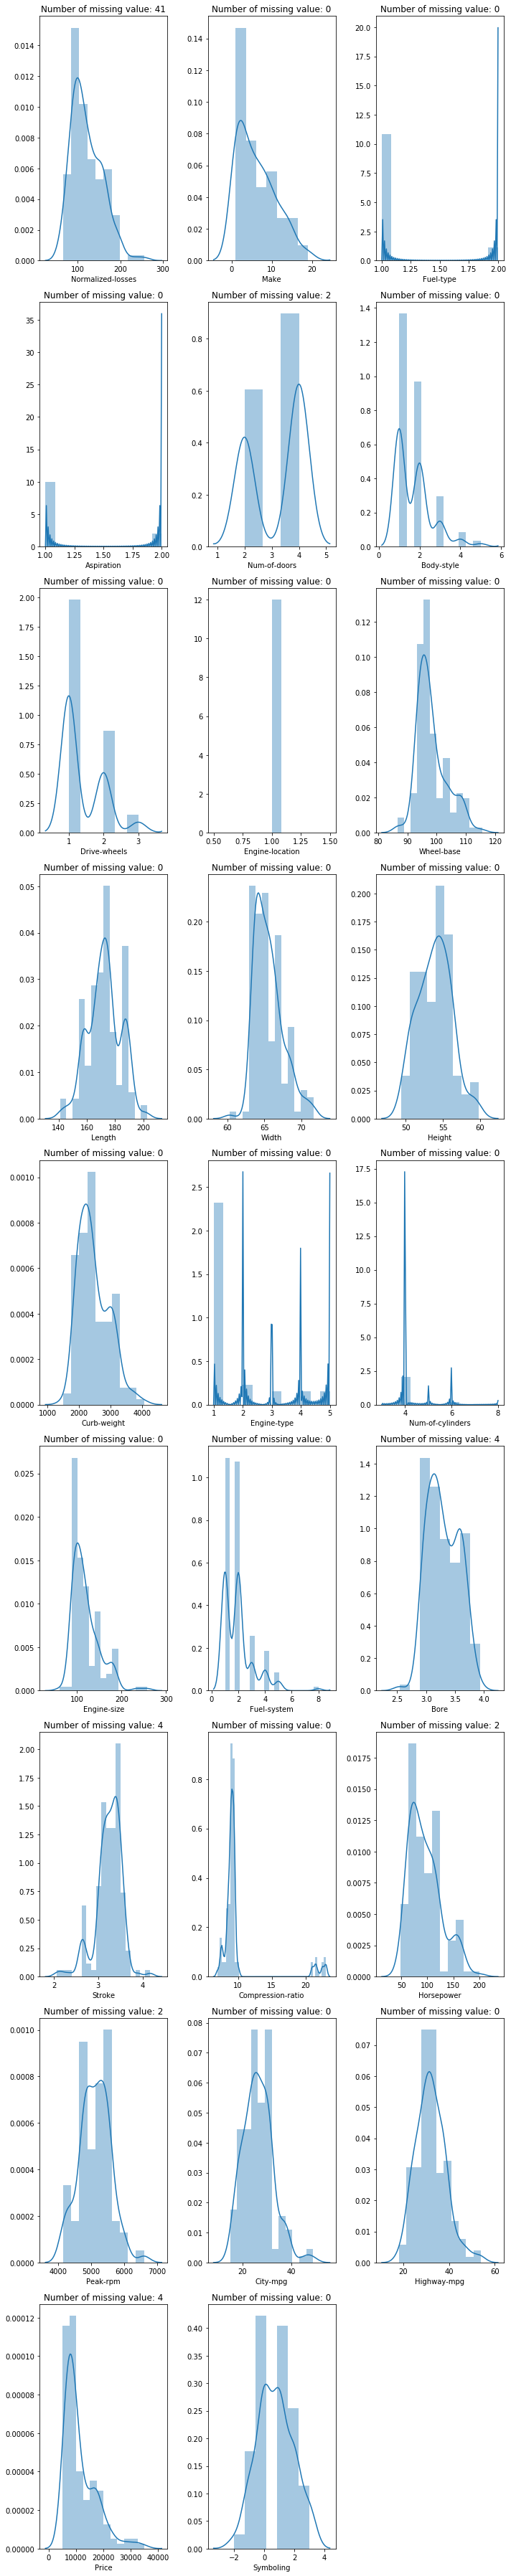

In [57]:
num_null = df.isnull().sum()
fig = plt.figure(figsize=(10, 50))

for i in range(1, df_del.shape[1]+1):
    fig.add_subplot(9, 3, i)
    sns.distplot(df_del[df_del.columns[i-1]])
    plt.title('Number of missing value: {}'.format(num_null[i-1]))

plt.tight_layout()

In [83]:
statistics = pd.DataFrame([df_del.mean(), df_del.median()])
statistics = pd.concat([statistics, df_del.mode()],axis=0)
#statistics.index = ['Mean', 'Median', 'Mode']
statistics

,Normalized-losses,Make,Fuel-type,Aspiration,Num-of-doors,Body-style,Drive-wheels,Engine-location,Wheel-base,Length,...,Fuel-system,Bore,Stroke,Compression-ratio,Horsepower,Peak-rpm,City-mpg,Highway-mpg,Price,Symboling
0,121.132075,6.232704,1.09434,1.169811,3.194969,1.710692,1.389937,1.0,98.264151,172.413836,...,1.962264,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,11445.72956,0.735849
1,113.000000,5.000000,1.00000,1.000000,4.000000,2.000000,1.000000,1.0,96.900000,172.400000,...,2.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,9233.00000,1.000000
0,161.000000,1.000000,1.00000,1.000000,4.000000,1.000000,1.000000,1.0,93.700000,157.300000,...,1.000000,3.620000,3.030000,9.000000,68.000000,4800.000000,31.000000,32.000000,5572.00000,0.000000
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.150000,NaN,NaN,NaN,NaN,38.000000,6229.00000,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6692.00000,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7295.00000,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7609.00000,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7775.00000,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7898.00000,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7957.00000,NaN


In [59]:
# impute using column mean
df_mean = df.fillna(df.mean())

# linear interpolation
df_linear = df.interpolate(method='linear')

## Predict missing data

In [60]:
# Experimental API
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

In [61]:
dt = DecisionTreeRegressor(random_state=42)
knn = KNeighborsRegressor(n_neighbors=15)

estimator_dt = IterativeImputer(estimator=dt, random_state=42)
estimator_knn = IterativeImputer(estimator=knn, random_state=42)

In [62]:

X = df[df.columns[:-1]]
y = df[df.columns[-1]]

X = np.array(X)
y = np.array(y)

In [63]:
X_dt = estimator_dt.fit_transform(X, y)
X_knn = estimator_knn.fit_transform(X, y)

## Learning

In [64]:
# delete
X_del, y_del = df_del[df_del.columns[:-1]], df_del[df_del.columns[-1]]
X_del, y_del = np.array(X_del), np.array(y_del)

# mean
X_mean, y_mean = df_mean[df_mean.columns[:-1]], df_mean[df_mean.columns[-1]]
X_mean, y_mean = np.array(X_mean), np.array(y_mean)

# linear
X_linear, y_linear = df_linear[df_linear.columns[:-1]], df_linear[df_linear.columns[-1]]
X_linear, y_linear = np.array(X_linear), np.array(y_linear)

data_list = [[X_del, y_del], [X_mean, y_mean], [X_linear, y_linear], [X_dt, y], [X_knn, y]]

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [66]:
# scaling
data = []
for i in range(len(data_list)):
    # scaling
    scaler = StandardScaler()
    data_list[i][0] = scaler.fit_transform(data_list[i][0])
    
    # split
    data.append(train_test_split(data_list[i][0], data_list[i][1],
                                 test_size=0.3, shuffle=True, random_state=42))

In [67]:
# (data, split)
# 0:x_train, 1:x_test, 2:y_train, 3:y_test
np.array(data).shape

(5, 4)

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:

clf = []

for i in range(len(data_list)):
    dt = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42)
    clf.append(dt.fit(data[i][0], data[i][2]))

## Evaluate

In [70]:
from sklearn import metrics

In [71]:
def calc_metrics(y_test, y_pred,average='micro'):
    pre = metrics.precision_score(y_test, y_pred,average = 'micro')
    recall = metrics.recall_score(y_test, y_pred,average = 'micro')
    acc = metrics.accuracy_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred,average = 'micro')
    metrics_list = [pre, recall, acc, f1]
    
    return metrics_list

In [72]:
result = []

for i in range(len(clf)):
    y_pred = clf[i].predict(data[i][1])
    result.append(calc_metrics(data[i][3], y_pred))


In [73]:
result_df = pd.DataFrame(result, columns=['Precision', 'Recall', 'Acc', 'F-score'])
result_df = result_df.assign(Method=['Delete', 'Mean', 'Linear', 'DT', 'k-NN'])
result_df = result_df[['Method', 'Precision', 'Recall', 'Acc', 'F-score']]

In [74]:

result_df

,Method,Precision,Recall,Acc,F-score
0,Delete,0.833333,0.833333,0.833333,0.833333
1,Mean,0.774194,0.774194,0.774194,0.774194
2,Linear,0.790323,0.790323,0.790323,0.790323
3,DT,0.790323,0.790323,0.790323,0.790323
4,k-NN,0.774194,0.774194,0.774194,0.774194


In [75]:

result_mlt = pd.melt(result_df, id_vars='Method', var_name='Metrics', value_name='values')
result_mlt.head()

,Method,Metrics,values
0,Delete,Precision,0.833333
1,Mean,Precision,0.774194
2,Linear,Precision,0.790323
3,DT,Precision,0.790323
4,k-NN,Precision,0.774194


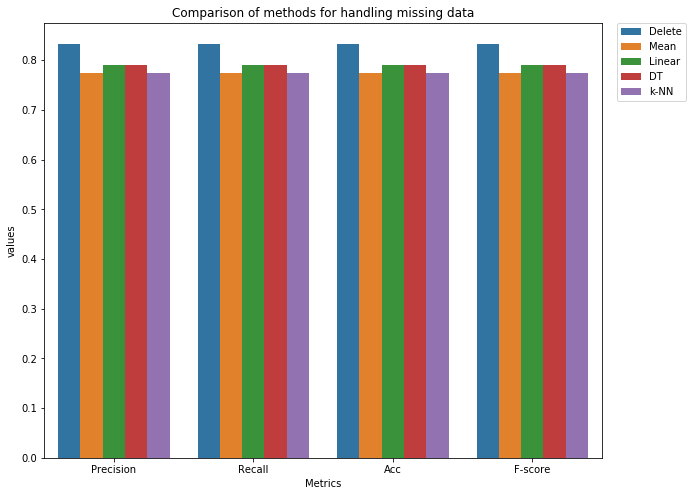

In [76]:

plt.figure(figsize=(10, 8))
sns.barplot(x='Metrics', y='values', hue='Method', data=result_mlt)
plt.title('Comparison of methods for handling missing data')
plt.legend(loc='best', bbox_to_anchor=(1.15, 1), borderaxespad=0)